In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Telecom_churn_rate.xlsx')

### Task 1: EDA & cleaning


In [4]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
2195,9891-NQDBD,Female,0,Yes,No,28,Yes,Yes,No,No internet service,...,No internet service,No internet service,One year,No,Mailed check,25.55,672.2,0,0,No
1739,9804-ICWBG,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,0,0,Yes
870,1937-OTUKY,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),98.20,7015.9,0,6,No
1507,7427-AUFPY,Male,0,No,No,54,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Credit card (automatic),19.65,1008.7,3,0,No
5602,9152-AMKAK,Male,0,No,No,6,Yes,No,DSL,Yes,...,Yes,Yes,Two year,Yes,Mailed check,80.25,493.4,0,0,No
2718,7274-CGTOD,Male,0,No,No,62,No,No phone service,DSL,Yes,...,No,No,Two year,Yes,Bank transfer (automatic),43.70,2618.3,0,0,No
4000,0420-HLGXF,Female,1,No,No,39,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.75,4036,0,0,No
3764,6674-KVJHG,Female,0,No,No,11,Yes,Yes,No,No internet service,...,No internet service,No internet service,One year,No,Electronic check,25.20,245.15,0,0,No
2781,5533-NHFRF,Male,1,No,No,7,No,No phone service,DSL,No,...,No,Yes,Month-to-month,Yes,Electronic check,44.40,265.8,0,0,No
6609,1000-AJSLD,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.10,20.1,0,0,Yes


In [5]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
df.shape

(7043, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [8]:
print(df['TotalCharges'].dtype)

object


In [9]:
df['TotalCharges'].unique()

array([29.85, 1889.5, 108.15, ..., 346.45, 306.6, 6844.5], dtype=object)

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
print(df['TotalCharges'].dtype)

float64


In [12]:
missing_data = df.isnull().sum()
print(missing_data)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64


In [13]:
missing_percent =(missing_data / len(df)) * 100
print(missing_percent)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
numAdminTickets     0.000000
numTechTickets      0.000000
Churn               0.000000
dtype: float64


In [14]:
missing_summary = pd.DataFrame({
    "missing_values": missing_data,
    "percent(%)": missing_percent.round(2)
})

In [15]:
print(missing_summary[missing_summary["missing_values"] > 0])

              missing_values  percent(%)
TotalCharges              11        0.16


In [16]:
df = df.dropna(subset=['TotalCharges'])

In [17]:
missing_data = df.isnull().sum()
missing_summary_after = pd.DataFrame({
    "missing_values": missing_data,
    "percent(%)": (missing_data / len(df)) * 100
})

In [18]:
print(missing_data)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64


#### Data Visualization:

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-1452144039.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="Set1")


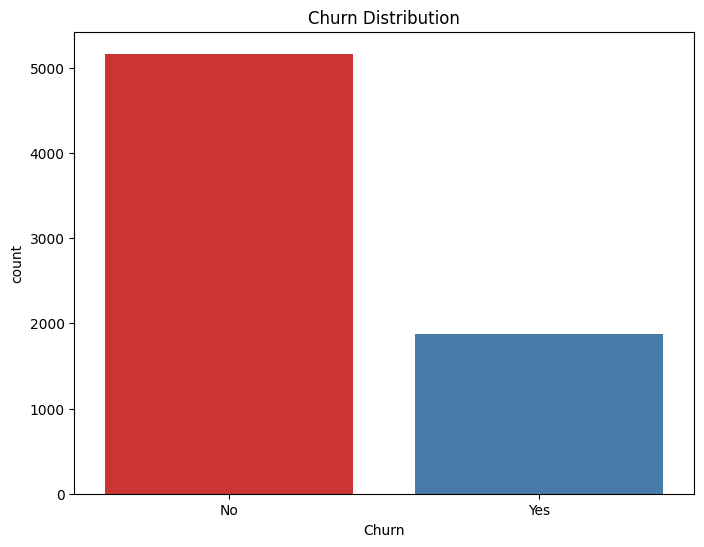

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Churn", palette="Set1")
plt.title("Churn Distribution")
plt.show()

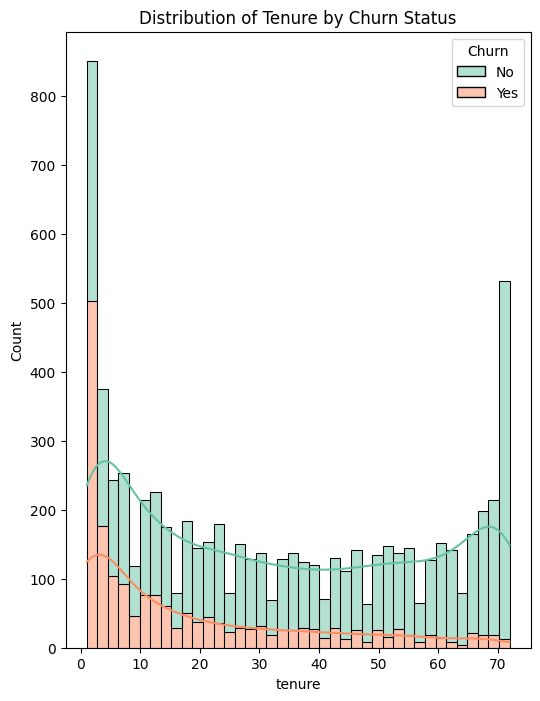

In [22]:
plt.figure(figsize=(6,8))
sns.histplot(data=df, x="tenure", hue="Churn", bins=40, kde=True, multiple="stack", palette="Set2")
plt.title("Distribution of Tenure by Churn Status")
plt.show()


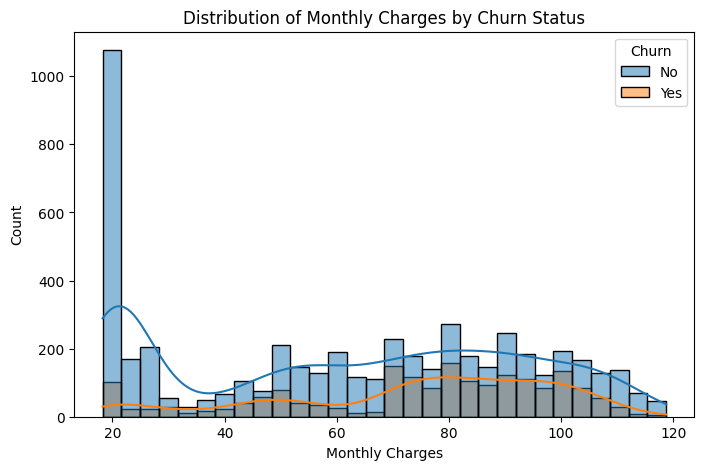

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", kde=True, bins=30)
plt.title("Distribution of Monthly Charges by Churn Status")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

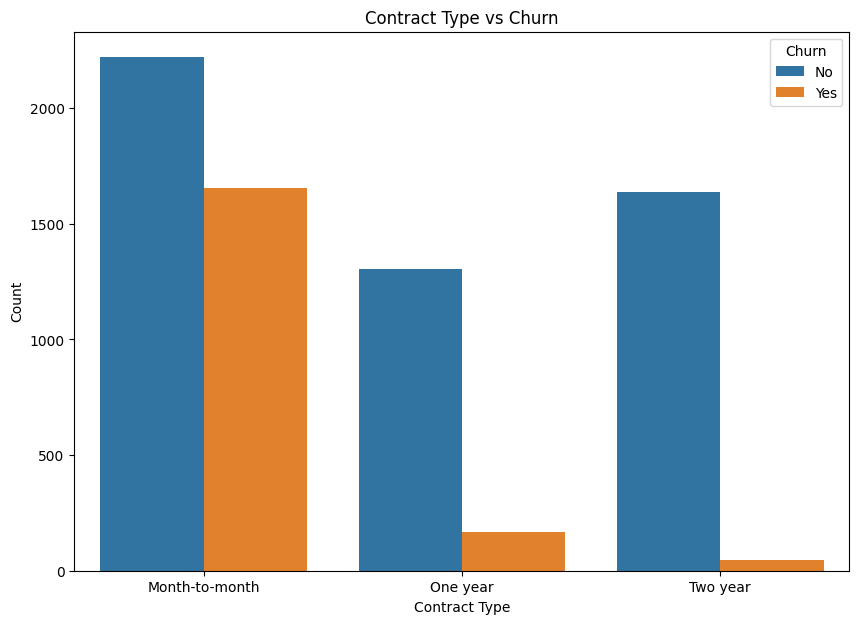

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

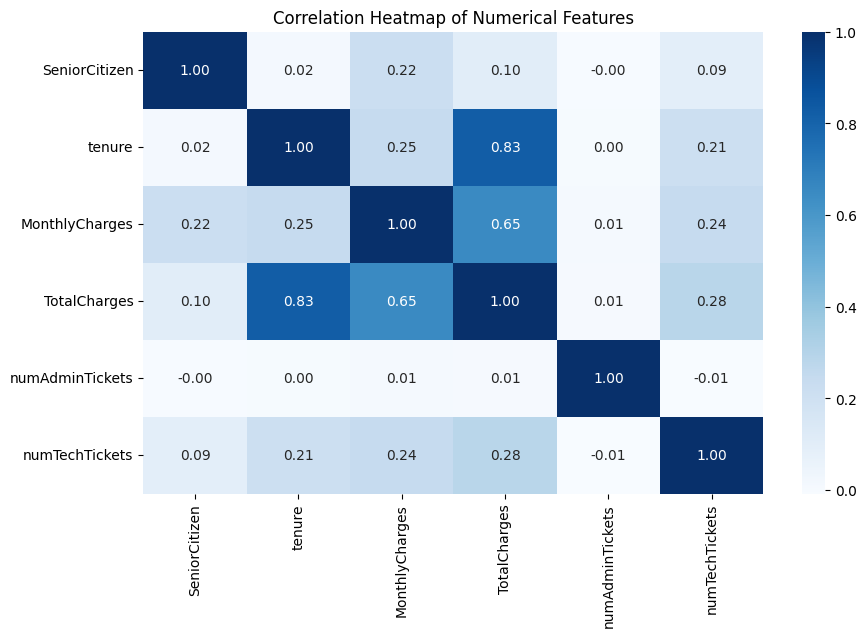

In [25]:
plt.figure(figsize=(10,6))
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

From the above heatmap we can say that TotalCharges - tenure and TotalCharges - MonthlyCharges are having high correlation. TotalCharges - tenure might have multicollinearity as they are highly correlated.

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df.drop(columns=['Churn'])
X = X.select_dtypes(include=['float64', 'int64'])
X_const = add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

           Feature        VIF
0            const  15.192906
1    SeniorCitizen   1.057219
2           tenure   5.851590
3   MonthlyCharges   3.330672
4     TotalCharges   9.569407
5  numAdminTickets   1.000269
6   numTechTickets   1.098891


const is the intercept, so we'll just ignore it.

TotalCharges have VIF = 9.56 (which is very high, that means it has multicollinearity.)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### Task 2: Feature Engineering

In [27]:
df['TenureGroup'] = pd.cut(df['tenure'],
                           bins=[0, 12, 24, 48, 72],
                           labels=['0-1 yr', '1-2 yrs', '2-4 yrs', '4-6 yrs'])

Helps the model capture nonlinear relationships between loyalty length and churn.The behaviour of very new customers & long-term customers is different

In [28]:
df['AvgMonthlyTickets'] = np.where(df['tenure'] > 0,
                                   (df['numAdminTickets'] + df['numTechTickets']) / df['tenure'],
                                   0).round(4)

Measures how often a customer raises support tickets relative to their tenure.

In [29]:
print(df[['tenure', 'TenureGroup', 'AvgMonthlyTickets']].head())

   tenure TenureGroup  AvgMonthlyTickets
0       1      0-1 yr             0.0000
1      34     2-4 yrs             0.0000
2       2      0-1 yr             0.0000
3      45     2-4 yrs             0.0667
4       2      0-1 yr             0.0000


#### df.head()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customerID         7032 non-null   object  
 1   gender             7032 non-null   object  
 2   SeniorCitizen      7032 non-null   int64   
 3   Partner            7032 non-null   object  
 4   Dependents         7032 non-null   object  
 5   tenure             7032 non-null   int64   
 6   PhoneService       7032 non-null   object  
 7   MultipleLines      7032 non-null   object  
 8   InternetService    7032 non-null   object  
 9   OnlineSecurity     7032 non-null   object  
 10  OnlineBackup       7032 non-null   object  
 11  DeviceProtection   7032 non-null   object  
 12  TechSupport        7032 non-null   object  
 13  StreamingTV        7032 non-null   object  
 14  StreamingMovies    7032 non-null   object  
 15  Contract           7032 non-null   object  
 16  PaperlessBi

### Task 3: Building the End-to-End Pipeline

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [32]:
X = df.drop(columns=['Churn', 'customerID', 'TotalCharges'])
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [33]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000,class_weight="balanced"))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

Numeric: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'numAdminTickets', 'numTechTickets', 'AvgMonthlyTickets']
Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureGroup']


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'numAdminTickets',
                                                   'numTechTickets',
                                                   'AvgMonthlyTickets']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   On...der(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'TenureGroup'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Logistic Regression Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

Logistic Regression Performance:
Accuracy : 0.8188
Precision: 0.6121
Recall   : 0.8690

Detailed Classification Report:
              precision    recall  f1-score   support

    No Churn       0.94      0.80      0.87      1033
       Churn       0.61      0.87      0.72       374

    accuracy                           0.82      1407
   macro avg       0.78      0.83      0.79      1407
weighted avg       0.86      0.82      0.83      1407



In this task, I chose Logistic regression as it is the basic model for classification.

Another model I chose was the Random forest, as it is an ensembling learning model, it generally gives better accuracy than the logistic regression or other linear models. As it captures non-linear relationship, while reducing overfitting through ensembling.

Third model I chose was Gradient boosting, as it is more advanced ensembling technique, that sequentially improve model's performance and also gets higher predictive accuracy.

### Task 4: Model Selection and Hyperparameter Tuning

In [37]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1500),
    "Random Forest": RandomForestClassifier(random_state=40),
    "Gradient Boosting": GradientBoostingClassifier(random_state=40)
}

for name, clf in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"{name}: F1-weighted = {f1:.3f}")

Logistic Regression: F1-weighted = 0.848
Random Forest: F1-weighted = 0.839
Gradient Boosting: F1-weighted = 0.850


#### Hyperparameter Tuning

In [38]:
param_grid_gb = {
    "classifier__n_estimators": [100, 200],
    "classifier__learning_rate": [0.01, 0.1],
    "classifier__max_depth": [5, 7]
}

gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

grid_search_gb = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=param_grid_gb,
    scoring="f1_weighted",
    cv=3,
    n_jobs=-1
)

grid_search_gb.fit(X_train, y_train)

print("Best Hyperparameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Cross-Validation F1-weighted:", grid_search_gb.best_score_)

y_pred_gb = grid_search_gb.predict(X_test)
from sklearn.metrics import f1_score
print("Test F1-weighted:", f1_score(y_test, y_pred_gb, average="weighted"))

from sklearn.metrics import classification_report
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred_gb, target_names=["No Churn", "Churn"]))


Best Hyperparameters for Gradient Boosting: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best Cross-Validation F1-weighted: 0.8569249769031847
Test F1-weighted: 0.8518723876235798

Classification Report on Test Data:
              precision    recall  f1-score   support

    No Churn       0.88      0.93      0.91      1033
       Churn       0.78      0.64      0.70       374

    accuracy                           0.86      1407
   macro avg       0.83      0.79      0.80      1407
weighted avg       0.85      0.86      0.85      1407



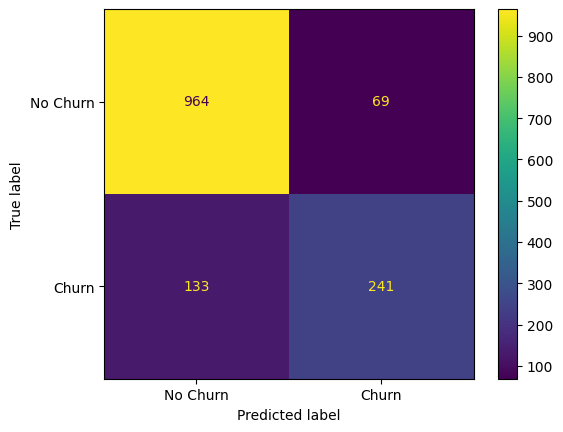

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(grid_search_gb, X_test, y_test, display_labels=["No Churn", "Churn"])
plt.show()


### Task 5: Handling Class Imbalance

In [40]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

smote_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=40)),
    ("classifier", GradientBoostingClassifier(random_state=40))
])

smote_pipeline.fit(X_train, y_train)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_res, y_res = smote_pipeline.named_steps["smote"].fit_resample(X_train_preprocessed, y_train)
print("\n Rows added by SMOTE (for oversampling)")
print("Before SMOTE:", X_train.shape[0], "rows")
print("After SMOTE:", X_res.shape[0], "rows")
print("Rows added:", X_res.shape[0] - X_train.shape[0])

print("\n === Without SMOTE ===")
print(classification_report(y_test, y_pred_gb, target_names=["No Churn", "Churn"]))
print("Test F1-weighted:", f1_score(y_test, y_pred_gb, average="weighted"))

y_pred_smote = smote_pipeline.predict(X_test)

print("\n=== With SMOTE ===")
print(classification_report(y_test, y_pred_smote, target_names=["No Churn", "Churn"]))

print("F1-weighted with SMOTE:",
      f1_score(y_test, y_pred_smote, average="weighted"))



 Rows added by SMOTE (for oversampling)
Before SMOTE: 5625 rows
After SMOTE: 8260 rows
Rows added: 2635

 === Without SMOTE ===
              precision    recall  f1-score   support

    No Churn       0.88      0.93      0.91      1033
       Churn       0.78      0.64      0.70       374

    accuracy                           0.86      1407
   macro avg       0.83      0.79      0.80      1407
weighted avg       0.85      0.86      0.85      1407

Test F1-weighted: 0.8518723876235798

=== With SMOTE ===
              precision    recall  f1-score   support

    No Churn       0.91      0.85      0.88      1033
       Churn       0.66      0.78      0.71       374

    accuracy                           0.83      1407
   macro avg       0.79      0.82      0.80      1407
weighted avg       0.85      0.83      0.84      1407

F1-weighted with SMOTE: 0.8377882146538863


The classification report shows that applying SMOTE did not significantly increase the overall weighted F1-score. However, it made the model fairer by improving recall for the minority class. In a churn prediction system, this trade-off is often worthwhile—identifying more potential churn cases (even with some false positives) is preferable, since missing actual churners can be more costly than mistakenly flagging non-churn customers.

### Task 6: Final Evaluation and Interpretation

In [41]:
from sklearn.metrics import roc_auc_score, confusion_matrix

In [42]:
y_pred_final = smote_pipeline.predict(X_test)
y_proba_final = smote_pipeline.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_proba_final)

print("Final Model Performance on Test Set:")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")
print(f"ROC AUC   : {roc_auc:.4f}")

Final Model Performance on Test Set:
Precision : 0.6584
Recall    : 0.7781
F1-Score  : 0.7132
ROC AUC   : 0.9150



Classification Report:
              precision    recall  f1-score   support

    No Churn       0.91      0.85      0.88      1033
       Churn       0.66      0.78      0.71       374

    accuracy                           0.83      1407
   macro avg       0.79      0.82      0.80      1407
weighted avg       0.85      0.83      0.84      1407

F1 weighted:  0.8377882146538863


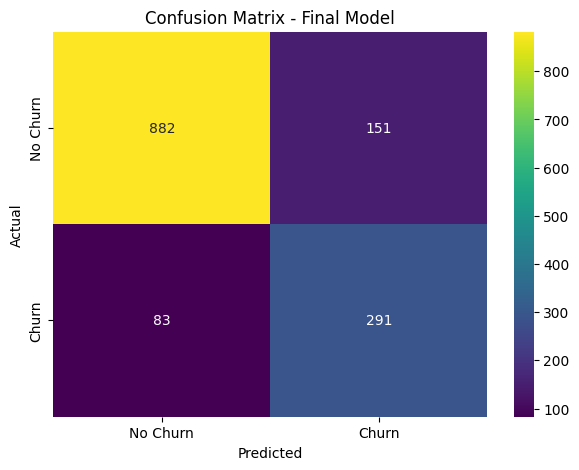

In [45]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=["No Churn", "Churn"]))
print("F1 weighted: ", f1_score(y_test, y_pred_smote, average="weighted"))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Final Model")
plt.show()

From the confusion matrix, we have: True Negatives = 882, False Positives = 151, False Negatives = 83, and True Positives = 291.

A False Positive occurs when the model predicts that a customer will churn, but the customer actually stays. In this case, the business might offer unnecessary discounts or promotions, leading to a small financial cost.

A False Negative occurs when the model predicts that a customer will stay, but in reality, the customer churns. This represents a lost opportunity to retain the customer, which is generally much more costly than providing discounts.

Therefore, in the context of churn prediction, False Negatives are worse because losing customers has a higher long-term business impact compared to the expense of offering incentives to those who were unlikely to churn.

### If your final model was a tree-based ensemble (like Random Forest or Gradient Boosting), extract and visualize the top 10 most important features. Discuss what these features tell you about the main drivers of customer churn.

/tmp/ipython-input-3273661686.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_features, palette='dark')


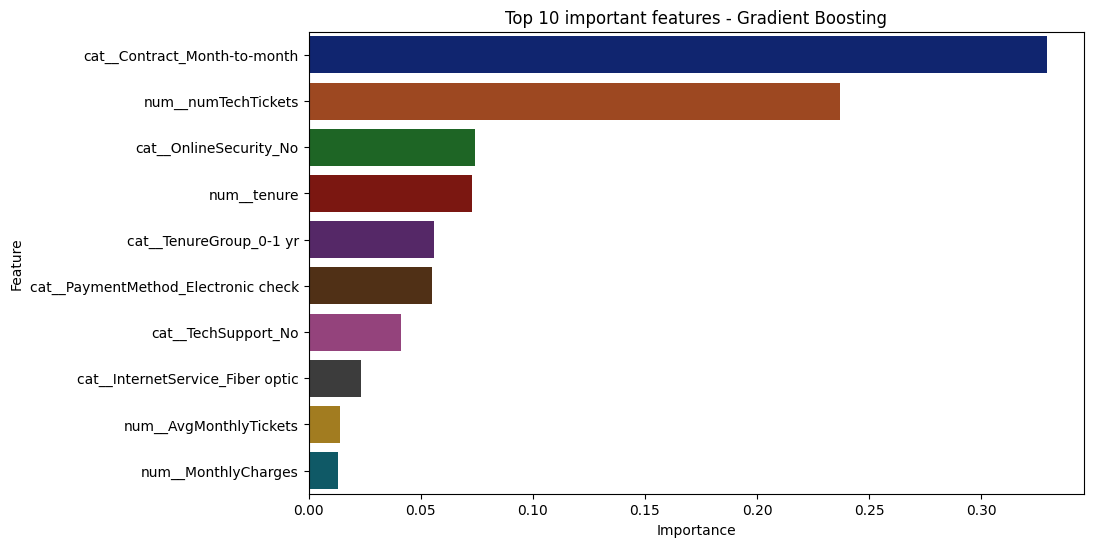

In [47]:
preprocessor = smote_pipeline.named_steps['preprocessor']
gb_model = smote_pipeline.named_steps['classifier']
feature_names = preprocessor.get_feature_names_out()

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': gb_model.feature_importances_
})

top_features = feature_importances.sort_values(by='importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=top_features, palette='dark')
plt.title('Top 10 important features - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [48]:
print("Top 10 features driving churn:")
for i, feature in enumerate(top_features['feature'], 1):
    print(f"{i}. {feature}")

Top 10 features driving churn:
1. cat__Contract_Month-to-month
2. num__numTechTickets
3. cat__OnlineSecurity_No
4. num__tenure
5. cat__TenureGroup_0-1 yr
6. cat__PaymentMethod_Electronic check
7. cat__TechSupport_No
8. cat__InternetService_Fiber optic
9. num__AvgMonthlyTickets
10. num__MonthlyCharges


The key factors driving customer churn are closely tied to contract type, tenure, and service usage. Customers on month-to-month contracts or with shorter tenures are more likely to churn, as their commitment and loyalty are lower. High volumes of support tickets also signal higher churn risk, particularly when customers lack add-on services such as Online Security, Tech Support, or Online Backup. In addition, payment method and service type play a role—customers paying via electronic checks or using fiber-optic internet often show higher churn rates. Overall, churn is more common among newer, less-engaged, and under-supported customers. Strengthening customer support, encouraging longer-term contracts, and promoting value-added services could significantly improve retention.